In [32]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
data = yf.download(tickers="BTC-USD",period="5d",interval="5m",timeout=300)

++Rcv raw: b'\x81\x0f{"type":"ping"}'
++Rcv decoded: fin=1 opcode=1 data=b'{"type":"ping"}'
[*********************100%***********************]  1 of 1 completed

WS: {'type': 'ping'}


In [34]:
df = data.copy()

# flatten columns
df.columns = df.columns.get_level_values(0)

# ensure datetime index
df.index = pd.to_datetime(df.index)
df.index.name = "Datetime"
df.index = df.index.strftime("%Y-%m-%d %H:%M:%S")

df.sample(5)

Price,Close,High,Low,Open,Volume
Datetime,,,,,
2026-02-05 14:05:00,69850.765625,69996.898438,69825.617188,69996.898438,0
2026-02-04 19:15:00,73524.843750,73524.843750,73378.945312,73378.945312,0
2026-02-04 11:35:00,75977.492188,76109.523438,75887.375000,75887.375000,417792
2026-02-04 14:40:00,75273.820312,75273.820312,75001.117188,75230.500000,0
2026-02-04 04:35:00,76549.570312,76610.046875,76549.414062,76581.414062,0


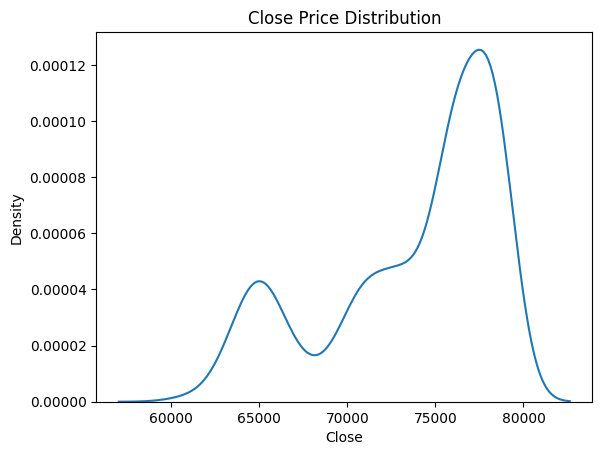

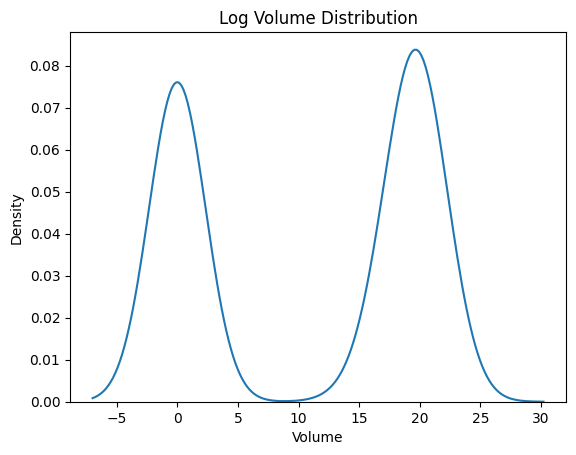

In [35]:
sns.kdeplot(df["Close"])
plt.title("Close Price Distribution")
plt.show()

sns.kdeplot(np.log1p(df["Volume"]))
plt.title("Log Volume Distribution")
plt.show()

In [36]:
df["time_numeric"] = df.index.astype("int64") // 10**9

sns.scatterplot(
    x=df["Close"],
    y=df["Volume"],
    hue=df["time_numeric"],
    palette="viridis",
    legend=False,
    alpha=0.7
)
plt.title("BTC Close vs Volume (Time Colored)")
plt.show()


ValueError: invalid literal for int() with base 10: '2026-02-02 00:00:00'

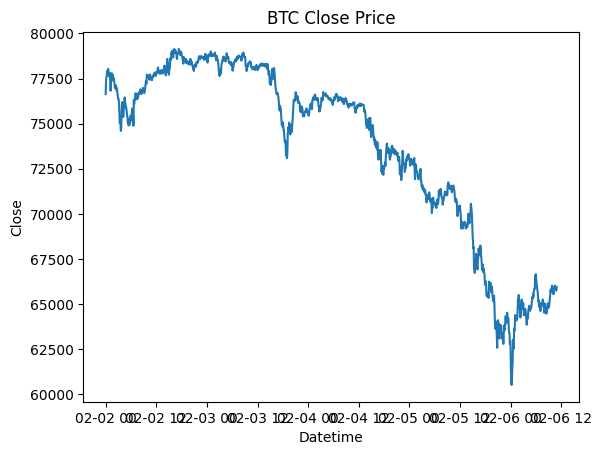

In [ ]:
sns.lineplot(x=df.index, y=df["Close"])
plt.title("BTC Close Price")
plt.show()


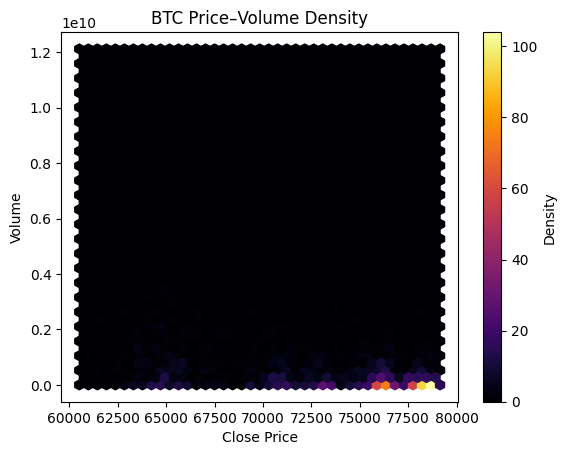

In [ ]:
plt.hexbin(df["Close"], df["Volume"], gridsize=40, cmap="inferno")
plt.colorbar(label="Density")
plt.xlabel("Close Price")
plt.ylabel("Volume")
plt.title("BTC Price–Volume Density")
plt.show()


In [ ]:
df["target"] = df["Close"].shift(-1)

# drop last row with NaN target
df = df.dropna()


In [ ]:
X = df[["Open", "High", "Low", "Close", "Volume"]]
y = df["target"]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, shuffle=False )
X_train.shape, X_test.shape

((1026, 5), (257, 5))

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Yahoo Finance

In [ ]:
import nest_asyncio
nest_asyncio.apply()

In [ ]:
import asyncio
import yfinance as yf

# define your message callback
def message_handler(message):
    print("Received message:", message)

async def main():
    # =======================
    # With Context Manager
    # =======================
    async with yf.AsyncWebSocket() as ws:
        await ws.subscribe(["AAPL", "BTC-USD"])
        await ws.listen()

    # =======================
    # Without Context Manager
    # =======================
    ws = yf.AsyncWebSocket()
    await ws.subscribe(["AAPL", "BTC-USD"])
    await ws.listen()

    asyncio.run(main())